1. Importing the Dependencies

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Data Collection and Inspection

In [87]:
car_dataset = pd.read_csv('/content/CAR DETAILS  Dataset.csv')


In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# inspecting the first 5 rows of the dataframe
car_dataset.head(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [90]:
# inspect how many columns in this original dataset
car_dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [91]:
# chck data typ for eac column
# Check the data type for each column
print(car_dataset.dtypes)

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object


3. Handling Duplicates

In [92]:
# Check and print the number of duplicate rows
print("Number of duplicate rows before removal:", car_dataset.duplicated().sum())
# Remove duplicate rows
car_dataset.drop_duplicates(inplace=True)
# Verify again after removal
print("Number of duplicate rows after removal:", car_dataset.duplicated().sum())

Number of duplicate rows before removal: 763
Number of duplicate rows after removal: 0


4. Basic Data Info and Missing Values Check

In [93]:
# Basic Info and Check for Null Values
car_dataset.info()  # Check data types and missing values
car_dataset.isnull().sum()  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


5. Data Cleaning - Removing Outliers and Whitespaces

In [94]:
# Optional: Remove extreme outliers
car_dataset = car_dataset[car_dataset['selling_price'] < car_dataset['selling_price'].quantile(0.99)]
car_dataset = car_dataset[car_dataset['km_driven'] < car_dataset['km_driven'].quantile(0.99)]


In [95]:
# Remove any unnecessary whitespaces in column names
car_dataset.columns = car_dataset.columns.str.strip()

6. Drop value when selling price is nan

In [96]:
# Fill missing values (if any) with appropriate values or drop them
car_dataset.dropna(subset=['selling_price'], inplace=True)  # Drop rows where selling_price or km_driven is NaN

7. Data Visualization - Selling Price Distribution

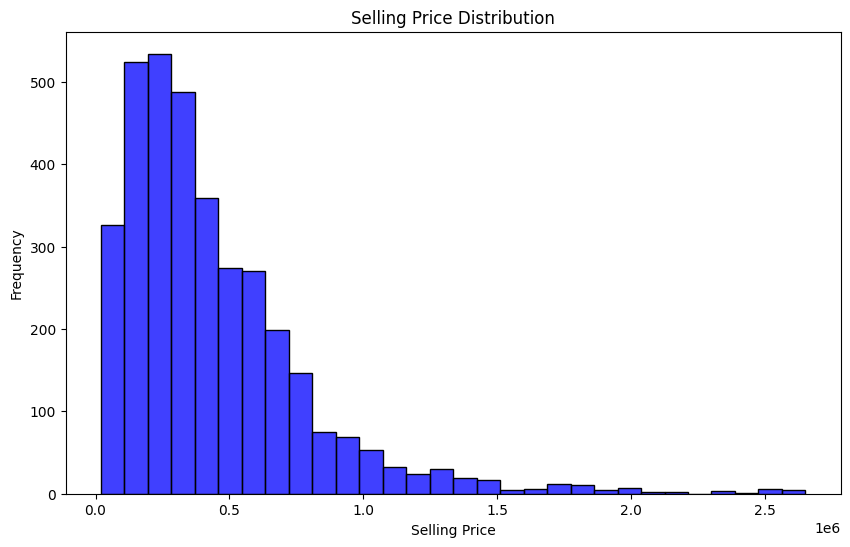

In [97]:
# Visualizing Data - Histograms and Distribution
plt.figure(figsize=(10, 6))
sns.histplot(car_dataset['selling_price'], bins=30, color='blue')
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

8. Box Plot for Kilometers Driven

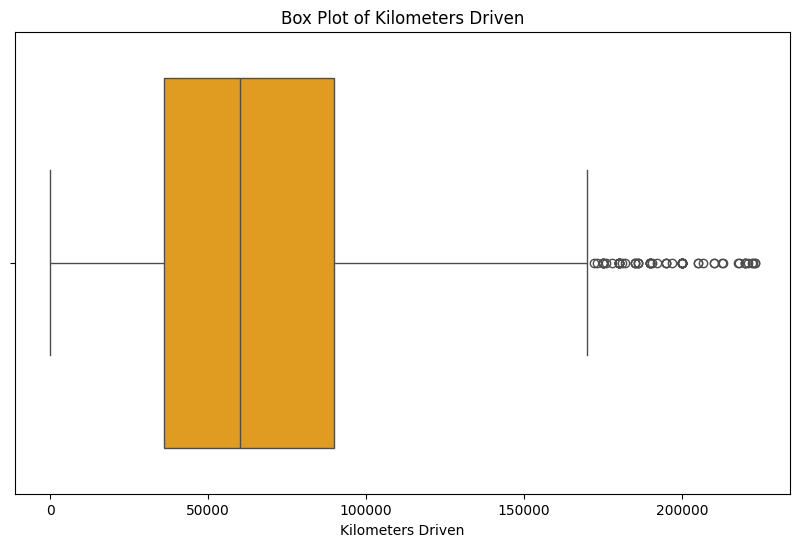

In [98]:
# Box Plot to Check for Outliers in 'km_driven'
plt.figure(figsize=(10, 6))
sns.boxplot(x=car_dataset['km_driven'], color='orange')
plt.title('Box Plot of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.show()

10. Scatter Plot - Selling Price vs Kilometers Driven

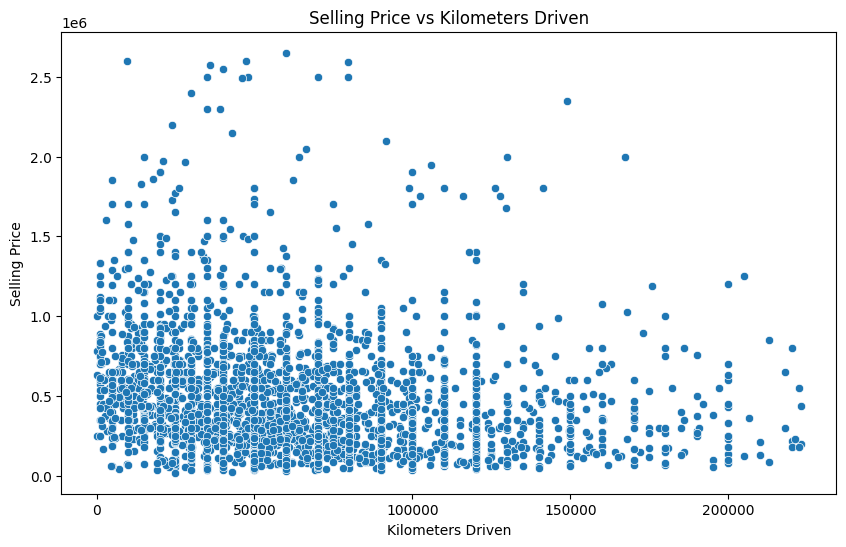

In [99]:
# Scatter Plot for 'Selling Price' vs. 'Km Driven'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=car_dataset)
plt.title('Selling Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

11. Save the Cleaned Dataset

In [100]:
# Save the cleaned dataset
car_dataset.to_csv('cleaned_car_dataset.csv', index=False)

12. Preview the Cleaned Dataset

In [102]:
# Display the first 5 rows after cleaning
car_dataset.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


13. Train-Test Split & Feature Encoding

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming `car_dataset` is your cleaned DataFrame loaded from Colab
df = car_dataset.copy()

le = LabelEncoder()
for col in ['fuel', 'seller_type', 'transmission', 'owner', 'name']:
    df[col] = le.fit_transform(df[col])

X = df.drop('selling_price', axis=1)
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


14.Model Training & Prediction

In [104]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


15.Evaluation Techniques

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} — MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")


Linear Regression — MAE: 169989.13, RMSE: 255637.23, R²: 0.47


16.Hyperparameter Tuning: Ridge Regression

In [106]:
# 16. Hyperparameter Tuning: Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

evaluate_model(y_test, y_pred_rf, "Random Forest")


Random Forest — MAE: 109650.39, RMSE: 201973.74, R²: 0.67


17.Compare Models

In [108]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")



Linear Regression — MAE: 169989.13, RMSE: 255637.23, R²: 0.47
Ridge Regression — MAE: 169876.21, RMSE: 255820.76, R²: 0.47
Random Forest — MAE: 109650.39, RMSE: 201973.74, R²: 0.67


18.Visualize Predictions

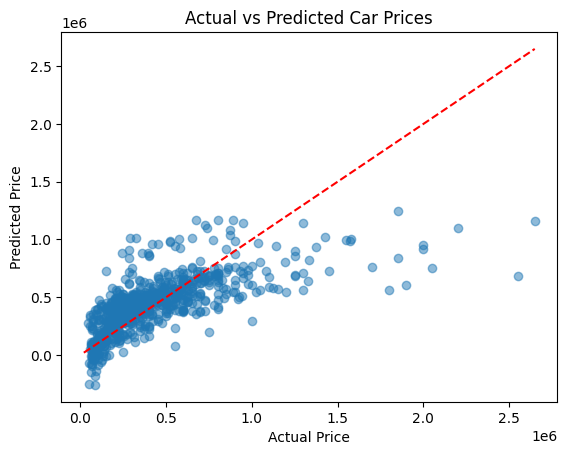

In [109]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

